In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_color_codes()
sns.set_style('white')

In [24]:
from sklearn.datasets import load_iris
data = load_iris()
data = pd.DataFrame(data.data, columns=data.feature_names)

In [35]:
from clumpy.preprocessing import process_data
X, num_cols, cat_cols = process_data(data, impute='mean', num_preprocessing='minmax')

In [36]:
from clumpy import auto_kmeans
kmeans = auto_kmeans(X, n_clusters=[3, 4, 5])

In [69]:
from clumpy import importance
X, num_cols, cat_cols = process_data(data, categorical_columns=cat_cols)
feature_names = num_cols + cat_cols

importances = importance.anova_importance(X, kmeans.labels_, feature_names=feature_names, n_features='all')
importances

{0: ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 1: ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 2: ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)']}

cluster_id: 0

petal length (cm) <= 2.45 

cluster_id: 1

petal length (cm) <= 5.2 AND
petal width (cm) <= 2.2 AND
sepal length (cm) > 4.7 AND
sepal width (cm) <= 2.95 

cluster_id: 2

petal length (cm) > 5.15 AND
sepal length (cm) > 6.15 



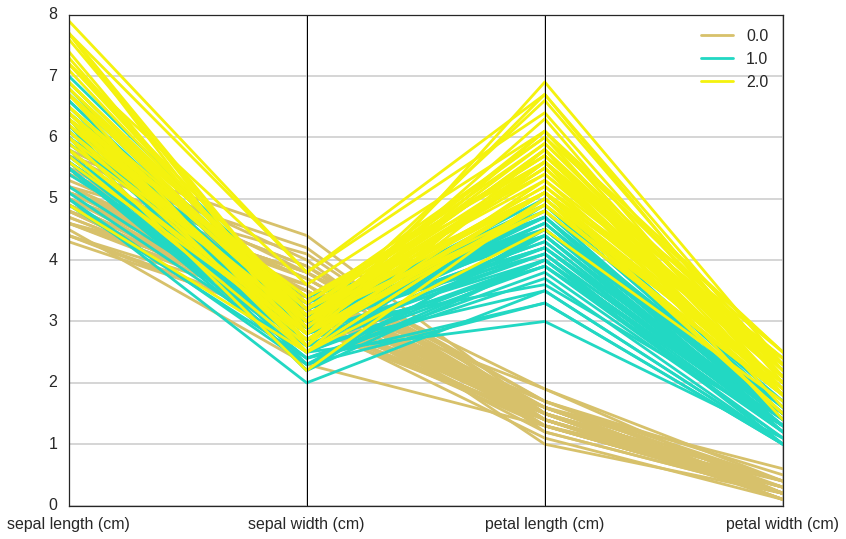

In [70]:
from clumpy.rules import tree_descriptions
rules = tree_descriptions(
    data, 
    kmeans.labels_, 
    categorical_columns=cat_cols,
    feature_names=importances,
    max_depth=5)

pd.DataFrame({'cluster_id': range(len(rules)), 'description': rules})
for cluster_id, rule in enumerate(rules):
    print('cluster_id: {}'.format(cluster_id))
    print
    print(rule)
    print
    
from pandas.tools.plotting import parallel_coordinates
full_data = load_iris()
full_data = pd.DataFrame(
    np.hstack((full_data.data, full_data.target[:, np.newaxis])), columns=full_data.feature_names + ['type'])
parallel_coordinates(full_data, 'type')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           5.843333             3.054           3.758667          1.198667   
0           5.006000             3.418           1.464000          0.244000   

         id  
0  marginal  
0   cluster  


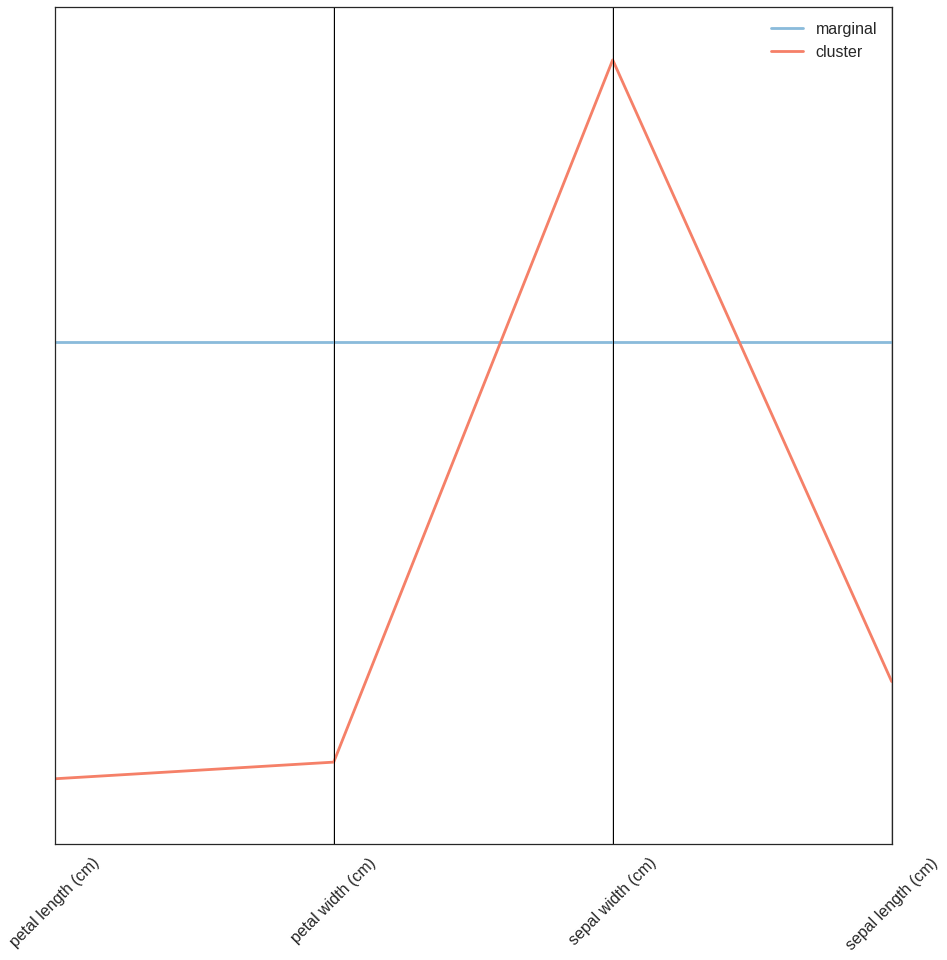

In [72]:
from clumpy.plots import plot_cluster_statistics

cluster_id = 0
cluster_importances = importances[cluster_id]
cat_vars = [var for var in cluster_importances if var in cat_cols]
num_vars = [var for var in cluster_importances if var in num_cols]

plot_cluster_statistics(
    cluster_labels=kmeans.labels_, 
    cluster_id=cluster_id, 
    data=data, scale=True,
    quant_var=num_vars,
    qual_var=cat_vars,
    figsize=(15,15))